#Sprint 1

In [108]:
#import necessory libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
#import dataset
data=pd.read_csv('car data.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [110]:
#shape of the data
data.shape

(301, 9)

301 rows and 9 coloumns

In [111]:
#Check the information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [112]:
#describe the dataset
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


#Data Preprocessing

In [113]:
#Checking Missing Values
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [114]:
#Correlation Matrix
corr=data.corr().style.background_gradient(cmap='gray')
corr

<ipython-input-114-dda7d68efa13>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


### **Visualization**

<ipython-input-115-14b2d5559f7f>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

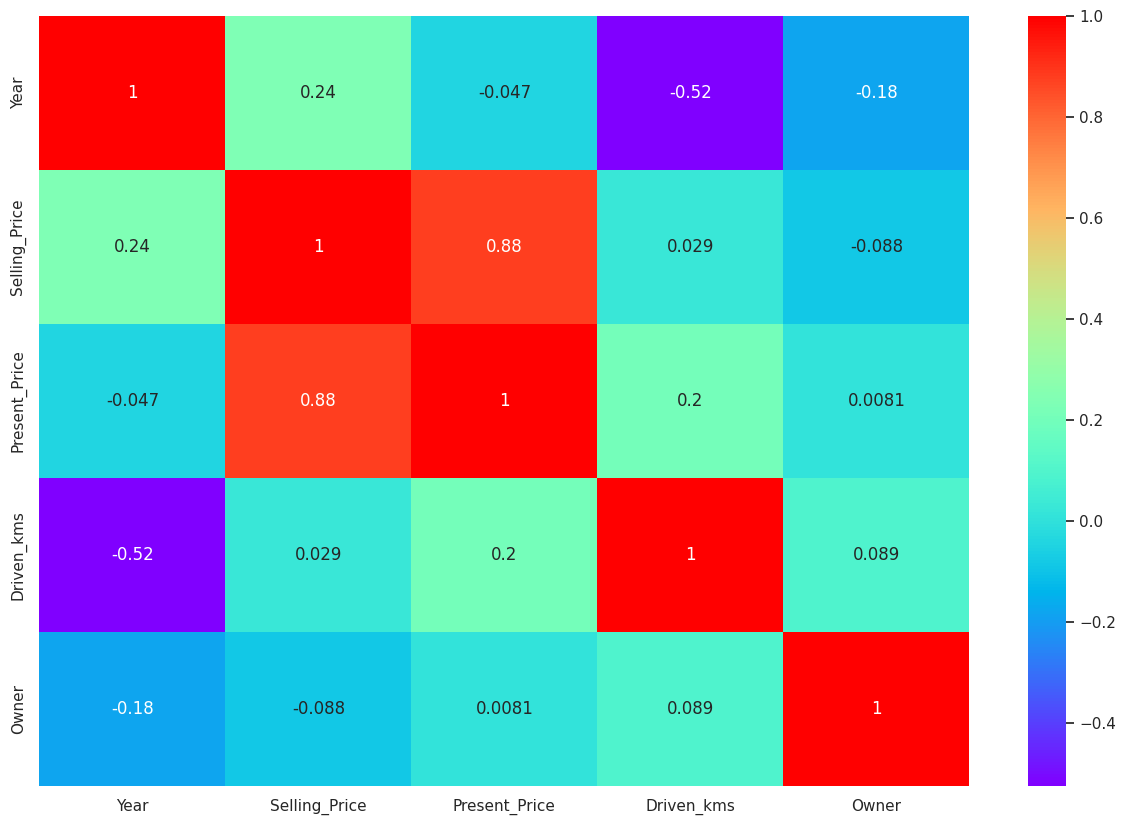

In [115]:
#Let's visualize the correlation matrix iin the seaborn
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data.corr(),annot=True,cmap='rainbow')

In [116]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

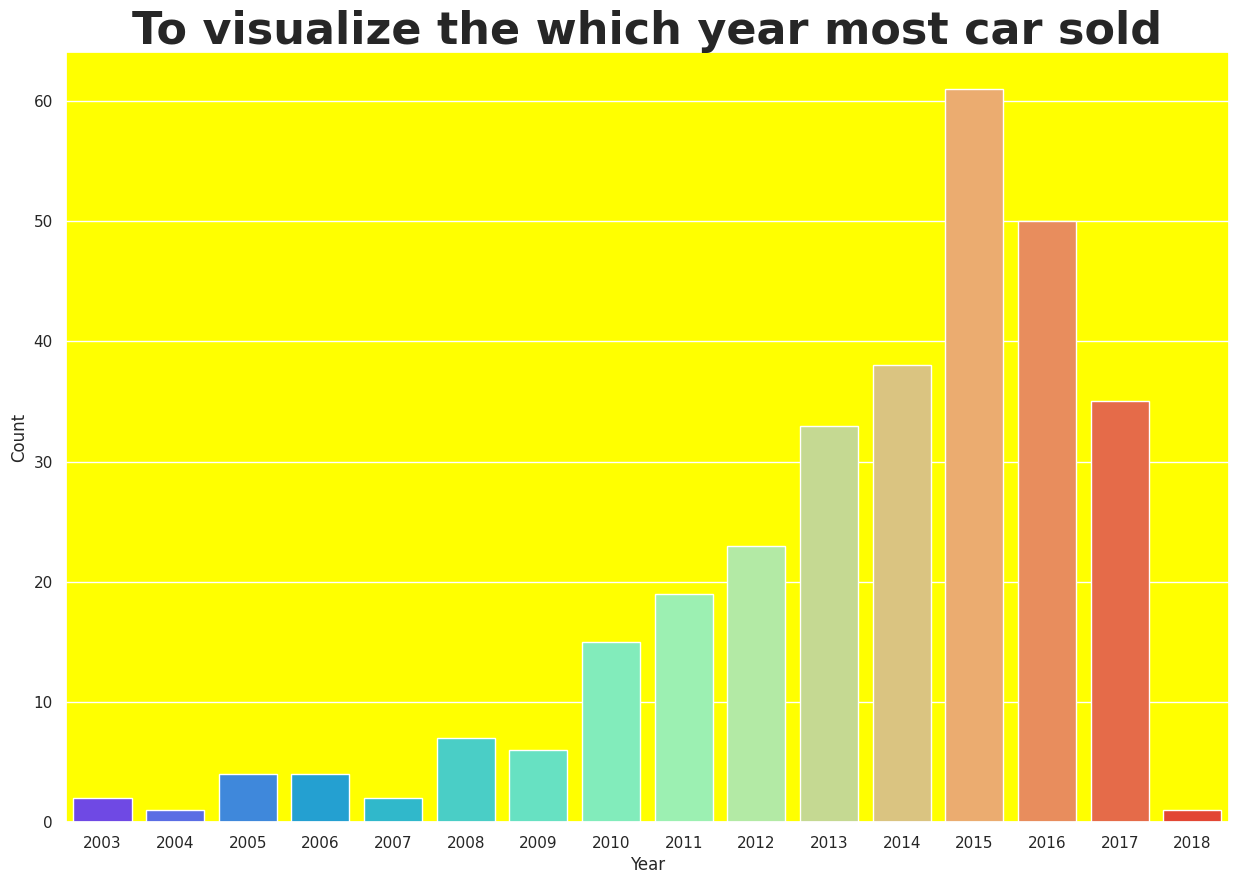

In [117]:
#To visualize the year in the dataset
year=data['Year'].value_counts()
#to visualize the year in the seaborn barplot
ax=plt.axes()
#set the background color
ax.set(facecolor='yellow')
#set the figures size
sns.set(rc={'figure.figsize':(16,8)},style='darkgrid')
#set the title of the plot
ax.set_title("To visualize the which year most car sold",fontsize=32,fontweight=900)
#let's visualize the barplot
sns.barplot(x=year.index,y=year,palette='rainbow')
#on the x axis
plt.xlabel("Year")
#on the y_axis
plt.ylabel("Count")
#let's visualize the image
plt.show()

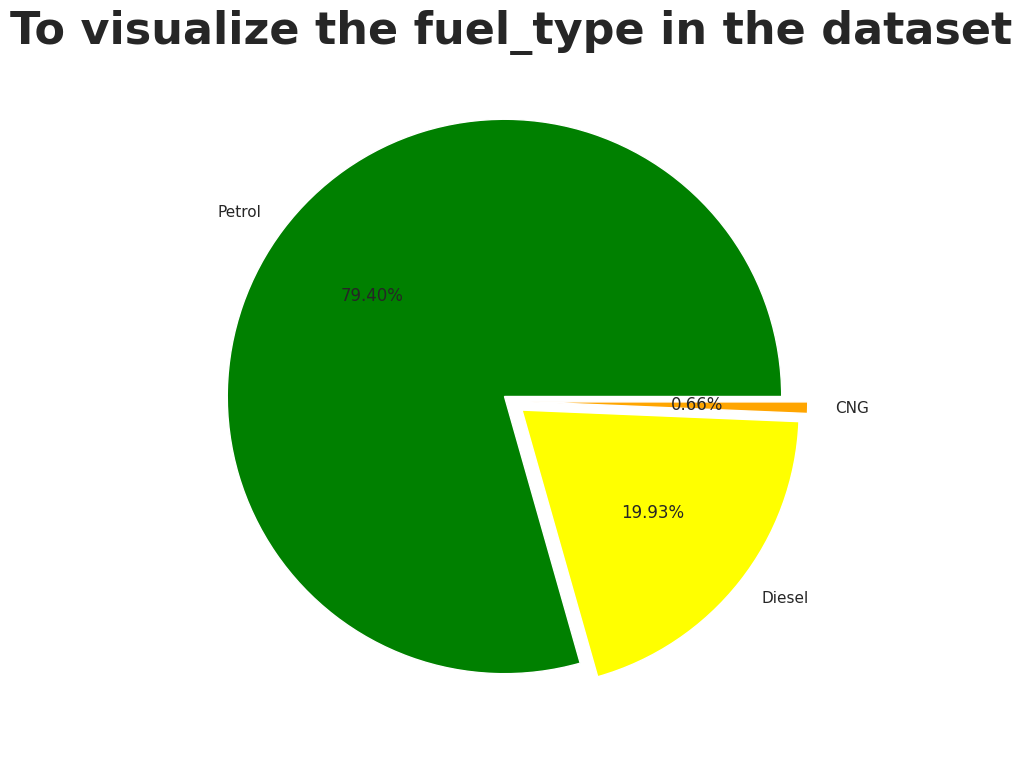

In [118]:
#Let's visualize the car names in the dataset
fuel_type=data['Fuel_Type'].value_counts()
#To visualize the top 20 car's sold
label=['Petrol','Diesel','CNG']
plt.figure(figsize=(16,9))
plt.pie(fuel_type,labels=label, autopct='%1.2f%%',explode=[0.03,0.05,0.07],colors=['green','yellow','orange'])
plt.title("To visualize the fuel_type in the dataset",fontsize=32,fontweight='bold')
plt.show()

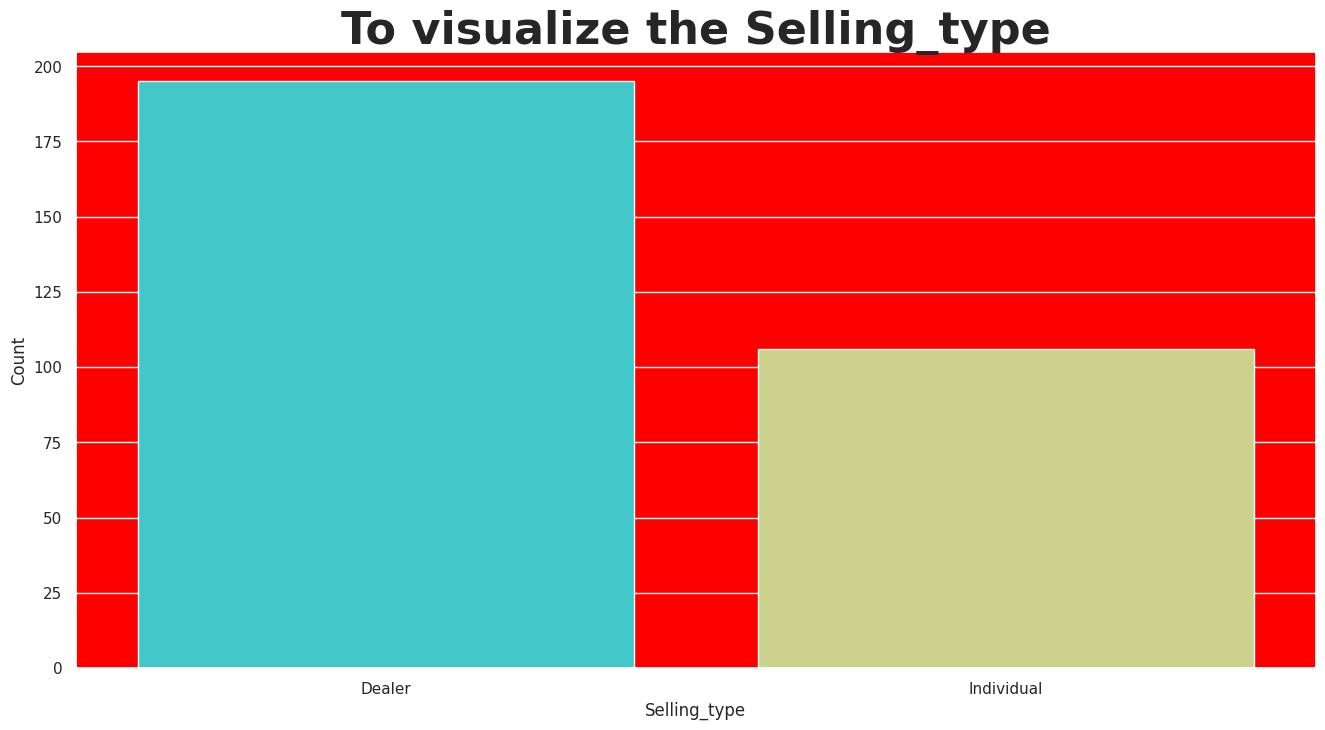

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the background color
ax = plt.axes()
ax.set(facecolor='red')

# Set the figure size
sns.set(rc={'figure.figsize': (8, 6)}, style='darkgrid')

# Set the title of the plot
ax.set_title("To visualize the Selling_type", fontsize=32, fontweight=900)

# Visualize the countplot
sns.countplot(data=data, x='Selling_type', palette='rainbow')

# Label the x-axis
plt.xlabel("Selling_type")

# Label the y-axis
plt.ylabel("Count")

# Visualize the plot
plt.show()


In [120]:
#Let's check the car model with selling price
car_selling_price=data[['Car_Name','Selling_Price']].groupby(['Car_Name','Selling_Price']).sum().reset_index().sort_values(by='Selling_Price',ascending=False)
import plotly.express as px
fig=px.histogram(car_selling_price,x='Car_Name',y='Selling_Price',title="To visualize the car model with selling price")
fig.update_layout(bargap=0.2,bargroupgap=0.1,
    plot_bgcolor='black')

fig.show()

## Data Cleaning

In [121]:
final_data=data.drop(['Car_Name'],axis=1)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Driven_kms     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Selling_type   301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [122]:
# checking the distribution of categorical data
print(data.Fuel_Type.value_counts())
print(data.Selling_type.value_counts())
print(data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Selling_type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [123]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the "Fuel_Type" column
final_data['Fuel_Type'] = label_encoder.fit_transform(final_data['Fuel_Type'])

# Now, the "Fuel_Type" column is label encoded

In [124]:
final_data.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,2,Dealer,Manual,0
1,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,2017,7.25,9.85,6900,2,Dealer,Manual,0
3,2011,2.85,4.15,5200,2,Dealer,Manual,0
4,2014,4.60,6.87,42450,1,Dealer,Manual,0


In [125]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the "Fuel_Type" column
final_data['Selling_type'] = label_encoder.fit_transform(final_data['Selling_type'])

# Now, the "Fuel_Type" column is label encoded

In [126]:
final_data.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,Manual,0
1,2013,4.75,9.54,43000,1,0,Manual,0
2,2017,7.25,9.85,6900,2,0,Manual,0
3,2011,2.85,4.15,5200,2,0,Manual,0
4,2014,4.60,6.87,42450,1,0,Manual,0


In [127]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the "Fuel_Type" column
final_data['Transmission'] = label_encoder.fit_transform(final_data['Transmission'])

# Now, the "Fuel_Type" column is label encoded

In [128]:
#final data after label encoding
final_data.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0


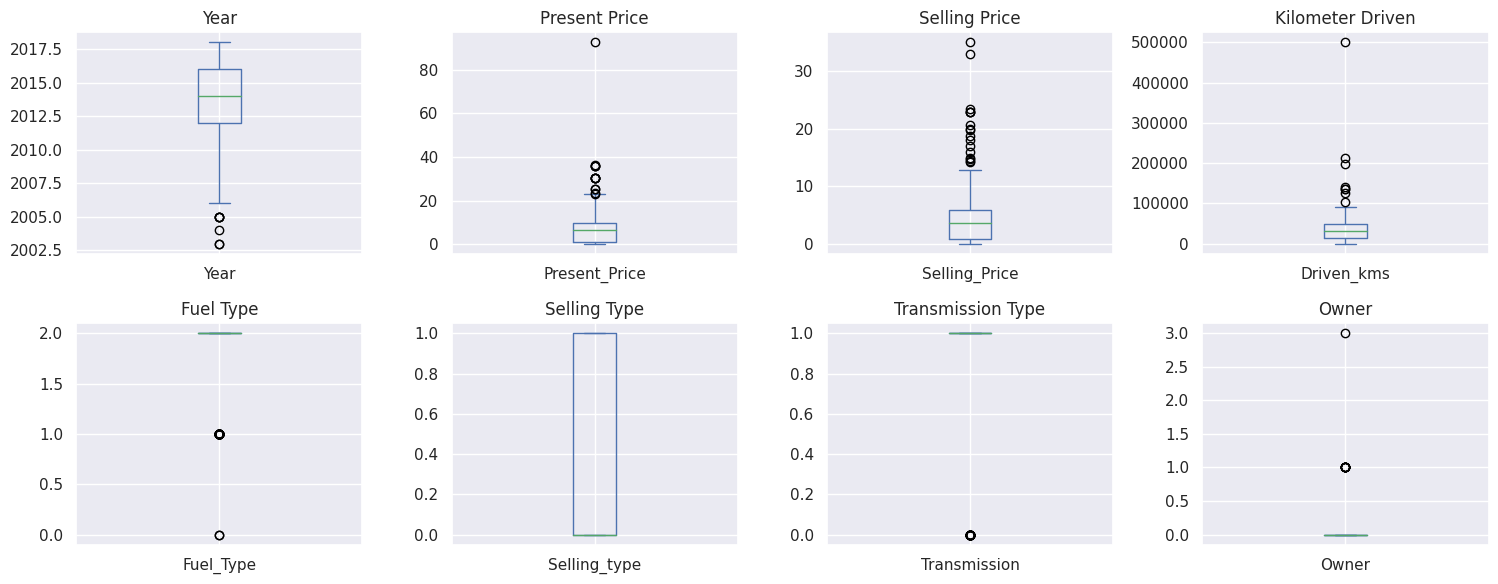

In [129]:
import matplotlib.pyplot as plt

# Create a figure with subplots for each feature
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 6))

# Create box plots for each feature
final_data['Year'].plot(kind='box', ax=axes[0, 0])
final_data['Present_Price'].plot(kind='box', ax=axes[0, 1])
final_data['Selling_Price'].plot(kind='box', ax=axes[0, 2])
final_data['Driven_kms'].plot(kind='box', ax=axes[0, 3])
final_data['Fuel_Type'].plot(kind='box', ax=axes[1, 0])
final_data['Selling_type'].plot(kind='box', ax=axes[1, 1])
final_data['Transmission'].plot(kind='box', ax=axes[1, 2])
final_data['Owner'].plot(kind='box', ax=axes[1, 3])

# Set titles for the subplots
axes[0, 0].set_title('Year')
axes[0, 1].set_title('Present Price')
axes[0, 2].set_title('Selling Price')
axes[0, 3].set_title('Kilometer Driven')
axes[1, 0].set_title('Fuel Type')
axes[1, 1].set_title('Selling Type')
axes[1, 2].set_title('Transmission Type')
axes[1, 3].set_title('Owner')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

#Sprint 2

###Split the data set for train and test

In [130]:
#import train_test_split
from sklearn.model_selection import train_test_split

In [131]:
features = final_data.drop(columns=['Selling_Price'])
target = final_data['Selling_Price']

In [132]:
#normalize the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#Let's normalize the train dataset
X=scaler.fit_transform(features)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [134]:
features

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,2,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,2,0,1,0
3,2011,4.15,5200,2,0,1,0
4,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,1,0
297,2015,5.90,60000,2,0,1,0
298,2009,11.00,87934,2,0,1,0
299,2017,12.50,9000,1,0,1,0


In [135]:
target

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

###Import Random forest Regression

In [136]:
#Install the RandomForestRegressor model to the sklearn
from sklearn.ensemble import RandomForestRegressor
#install the RandomForestRegressor
random=RandomForestRegressor()
#Let's fit the train data to the model
random.fit(X_train,y_train)
#Prediction to the test dataset
random_pred=random.predict(X_test)

In [137]:
X_train

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
185,2008,0.58,1900,2,1,0,0
72,2013,18.61,56001,2,0,1,0
15,2016,10.79,43000,1,0,1,0
10,2017,3.60,2135,2,0,1,0
196,2008,0.52,500000,2,1,0,0
...,...,...,...,...,...,...,...
188,2013,0.57,18000,2,1,1,0
71,2011,12.48,45000,1,0,1,0
106,2014,3.45,16500,2,1,1,1
270,2011,10.00,69341,2,0,1,0


In [138]:
y_train

185    0.25
72     7.45
15     7.75
10     2.85
196    0.17
       ... 
188    0.25
71     4.50
106    1.35
270    4.10
102    1.65
Name: Selling_Price, Length: 210, dtype: float64

In [139]:
X_test

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
177,2016,0.57,24000,2,1,0,0
289,2016,13.60,10980,2,0,1,0
228,2012,9.40,60000,1,0,1,0
198,2011,0.57,35000,2,1,1,1
60,2013,18.61,40001,2,0,1,0
...,...,...,...,...,...,...,...
119,2013,1.90,5400,2,1,1,0
19,2010,7.98,41442,2,0,1,0
181,2016,0.48,50000,2,1,1,0
79,2012,30.61,89000,1,0,0,0


In [140]:
y_test

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
       ...  
119     1.05
19      2.65
181     0.30
79     14.50
114     1.15
Name: Selling_Price, Length: 91, dtype: float64

In [141]:
random_pred

array([ 0.4775, 11.1639,  5.057 ,  0.1901,  7.4016,  6.121 ,  1.0751,
        0.5745,  0.4744,  6.7725,  7.7724,  1.0001,  7.5729,  0.464 ,
        5.365 ,  2.4645,  1.136 , 13.0314,  0.475 ,  1.5895,  0.2611,
        7.99  ,  4.8215,  2.8105,  0.5145,  3.937 ,  5.4015,  3.3035,
        1.1633,  1.2177,  0.4977,  9.5685,  0.4697,  2.6885,  7.8124,
        4.2465,  6.2735,  6.2485,  2.6245,  6.7193,  4.3295,  3.6695,
        4.938 ,  0.5571,  6.03  ,  0.7279,  7.823 ,  5.477 ,  2.912 ,
        4.072 ,  4.8795,  1.4835, 23.9525, 19.6005,  6.1275, 10.5234,
        5.003 ,  9.1184,  2.6175,  6.8289,  0.2329,  0.2233,  0.8153,
        0.4507,  4.306 ,  1.1305, 23.188 , 21.8425,  6.2705,  0.4761,
        3.8075,  3.709 ,  5.79  ,  4.5515,  2.853 ,  1.0175,  0.7536,
       11.9013,  0.3923,  9.9041,  5.1605,  3.3925,  5.5145, 15.2308,
        2.5235,  0.4587,  1.171 ,  2.993 ,  0.4771, 16.8435,  1.1452])

In [142]:
#Check the test score and train score to the RandomForestRegressor algorithm
print(f'The Test_accuracy: {random.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {random.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 95.78
The Train_accuracy: 98.14


In [143]:
#RandomForestRegressor algorithms mean_squared_error and r2_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
mse=mean_squared_error(y_test,random_pred)
rmse=np.sqrt(mse)
print("Root_mean_squred_error RandomForestRegressor {:.4f}".format(rmse))
print("R2_score RandomForestRegressor {:4f}".format(r2_score(y_test,random_pred)))
print("mean_absolute_error RandomForestRegressor {:4f}".format(mean_absolute_error(y_test,random_pred)))

Root_mean_squred_error RandomForestRegressor 1.0958
R2_score RandomForestRegressor 0.957826
mean_absolute_error RandomForestRegressor 0.641478


In [144]:
user_input_features = []

# Ask the user to input the features one by one
print("Enter the following details for prediction:")
for feature_name in features.columns:
    value = input(f"Enter {feature_name}: ")
    user_input_features.append(float(value))

# Convert the user input to a numpy array
user_input = np.array(user_input_features).reshape(1, -1)

# Use the trained model to predict based on user input
predicted_price = random.predict(user_input)
print(f"The predicted price based on the input is: {predicted_price[0]:.2f}")

Enter the following details for prediction:
Enter Year: 2016
Enter Present_Price: 0.57
Enter Driven_kms: 24000
Enter Fuel_Type: 2
Enter Selling_type: 1
Enter Transmission: 0
Enter Owner: 0
The predicted price based on the input is: 0.48


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [145]:
pip install joblib


In [146]:
from joblib import dump

# Save the trained model to a file
dump(random, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [147]:
import sklearn
print(sklearn.__version__)



1.2.2
